In [356]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('always')

In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [358]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [359]:
data = pd.read_csv('Train (2).csv')

In [360]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [361]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000003B6C4C0948>,
      dtype=object)

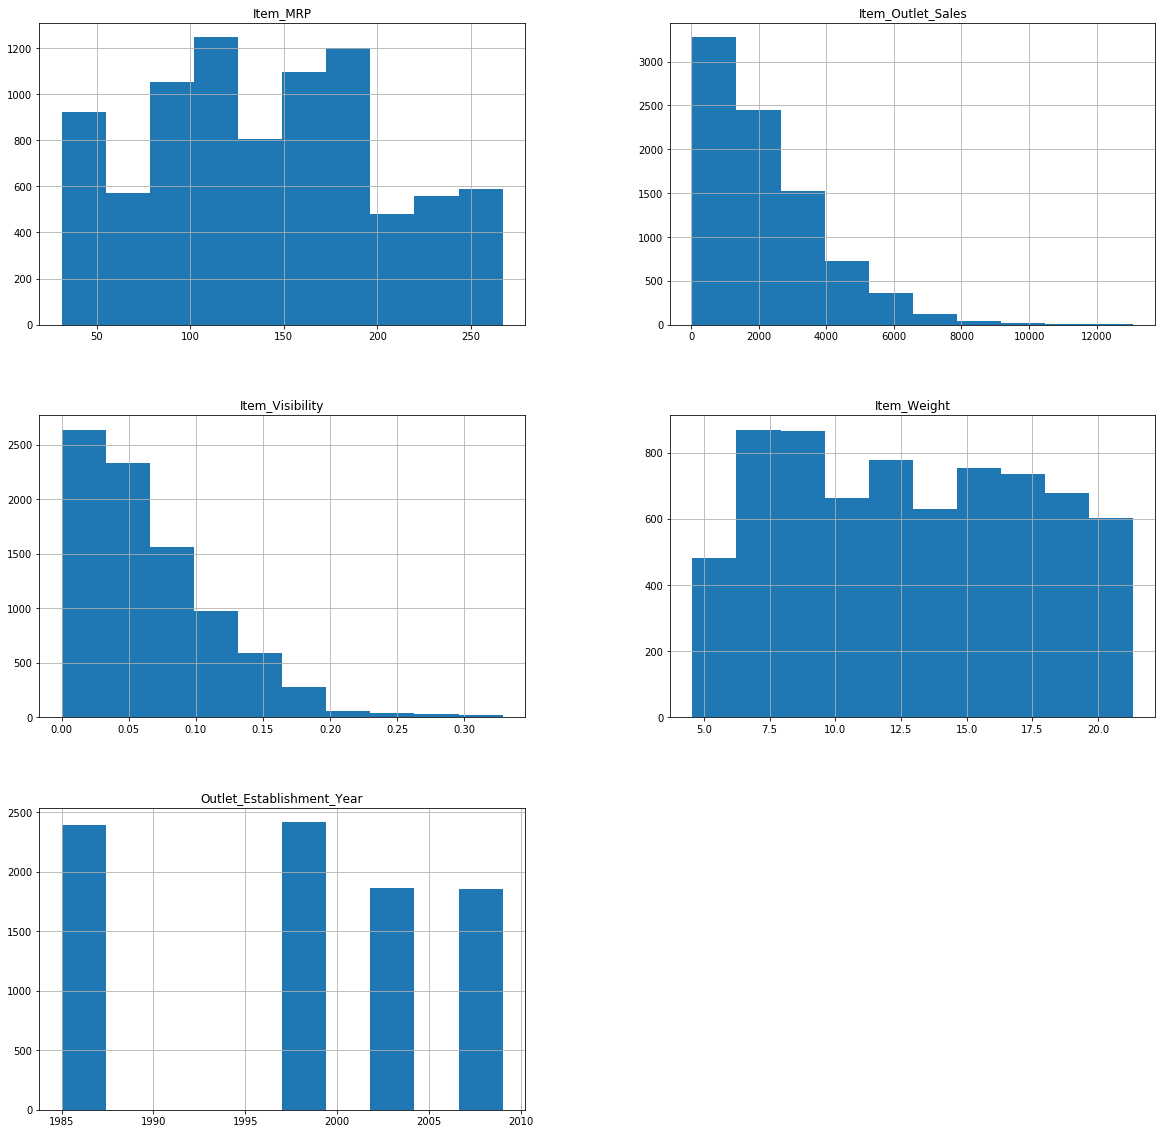

In [362]:
data.hist(figsize=(20,20))

In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [364]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


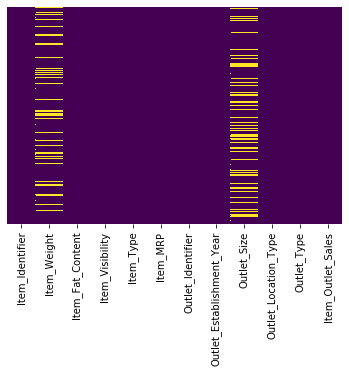

In [365]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [366]:
##missing values

In [367]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)


In [368]:
data.isnull().sum().sum()

0

In [369]:
## outliers

In [370]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
newdata = data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]

In [371]:
data.shape , newdata.shape

((8523, 12), (8193, 12))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


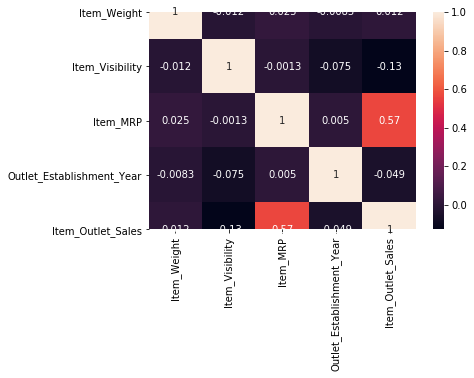

In [372]:
sns.heatmap(data.corr(), annot = True)


In [373]:
newdata.columns[data.dtypes==object]

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [374]:
newdata.pivot_table('Item_Outlet_Sales',index='Outlet_Type',columns='Outlet_Location_Type',aggfunc='count',margins=True)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3,All
Outlet_Type,,,,
Grocery Store,451.0,NaN,488.0,939
Supermarket Type1,1839.0,2741.0,917.0,5497
Supermarket Type2,NaN,NaN,925.0,925
Supermarket Type3,NaN,NaN,832.0,832
All,2290.0,2741.0,3162.0,8193


In [375]:
newdata=newdata.drop('Item_Identifier',axis=1)
newdata=newdata.drop('Outlet_Identifier',axis=1)

In [376]:
newdata.Item_Fat_Content.value_counts()

Low Fat    4898
Regular    2769
LF          304
reg         115
low fat     107
Name: Item_Fat_Content, dtype: int64

In [377]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [378]:
newdata['Item_Fat_Content'] = labelencoder.fit_transform(newdata['Item_Fat_Content'])

In [379]:
newdata.Item_Fat_Content.value_counts()

1    4898
2    2769
0     304
4     115
3     107
Name: Item_Fat_Content, dtype: int64

In [380]:
newdata.Item_Type.value_counts()

Fruits and Vegetables    1175
Snack Foods              1154
Household                 877
Frozen Foods              830
Dairy                     649
Canned                    626
Baking Goods              622
Health and Hygiene        507
Soft Drinks               428
Meat                      409
Breads                    242
Hard Drinks               207
Others                    167
Starchy Foods             139
Breakfast                 101
Seafood                    60
Name: Item_Type, dtype: int64

In [381]:
newdata['Item_Type'].replace(['Fruits and Vegetables','Snack Foods'],0,inplace=True)
newdata['Item_Type'].replace(['Household','Frozen Foods'],1,inplace=True)
newdata['Item_Type'].replace(['Dairy','Canned','Baking Goods'],2,inplace=True)
newdata['Item_Type'].replace(['Health and Hygiene','Soft Drinks','Meat'],3,inplace=True)
newdata['Item_Type'].replace(['Breads','Hard Drinks','Others'],4,inplace=True)
newdata['Item_Type'].replace(['Starchy Foods','Breakfast','Seafood'],5,inplace=True)

In [382]:
newdata['Outlet_Size'] = labelencoder.fit_transform(newdata['Outlet_Size'])

In [383]:
newdata.Item_Type.value_counts()

0    2329
2    1897
1    1707
3    1344
4     616
5     300
Name: Item_Type, dtype: int64

In [384]:
newdata['Outlet_Location_Type'] = labelencoder.fit_transform(newdata['Outlet_Location_Type'])

In [385]:
newdata.Outlet_Location_Type.value_counts()

2    3162
1    2741
0    2290
Name: Outlet_Location_Type, dtype: int64

In [386]:
newdata['Outlet_Type'] = labelencoder.fit_transform(newdata['Outlet_Type'])

In [387]:
newdata.Outlet_Type.value_counts()

1    5497
0     939
2     925
3     832
Name: Outlet_Type, dtype: int64

In [388]:
newdata.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [389]:
newdata.isnull().sum().sum()

0

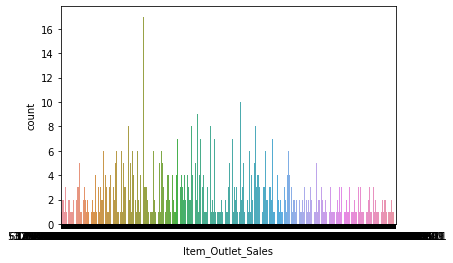

In [390]:
sns.countplot('Item_Outlet_Sales',data =newdata)

In [391]:

newdata.pivot_table('Item_Outlet_Sales',index='Outlet_Type',columns='Outlet_Location_Type',aggfunc='count',margins=True)

Outlet_Location_Type,0,1,2,All
Outlet_Type,,,,
0,451.0,NaN,488.0,939
1,1839.0,2741.0,917.0,5497
2,NaN,NaN,925.0,925
3,NaN,NaN,832.0,832
All,2290.0,2741.0,3162.0,8193


In [392]:
num_cal = newdata.columns[newdata.dtypes!=object]
num_cal.shape

(10,)

ValueError: num must be 1 <= num <= 18, not 19

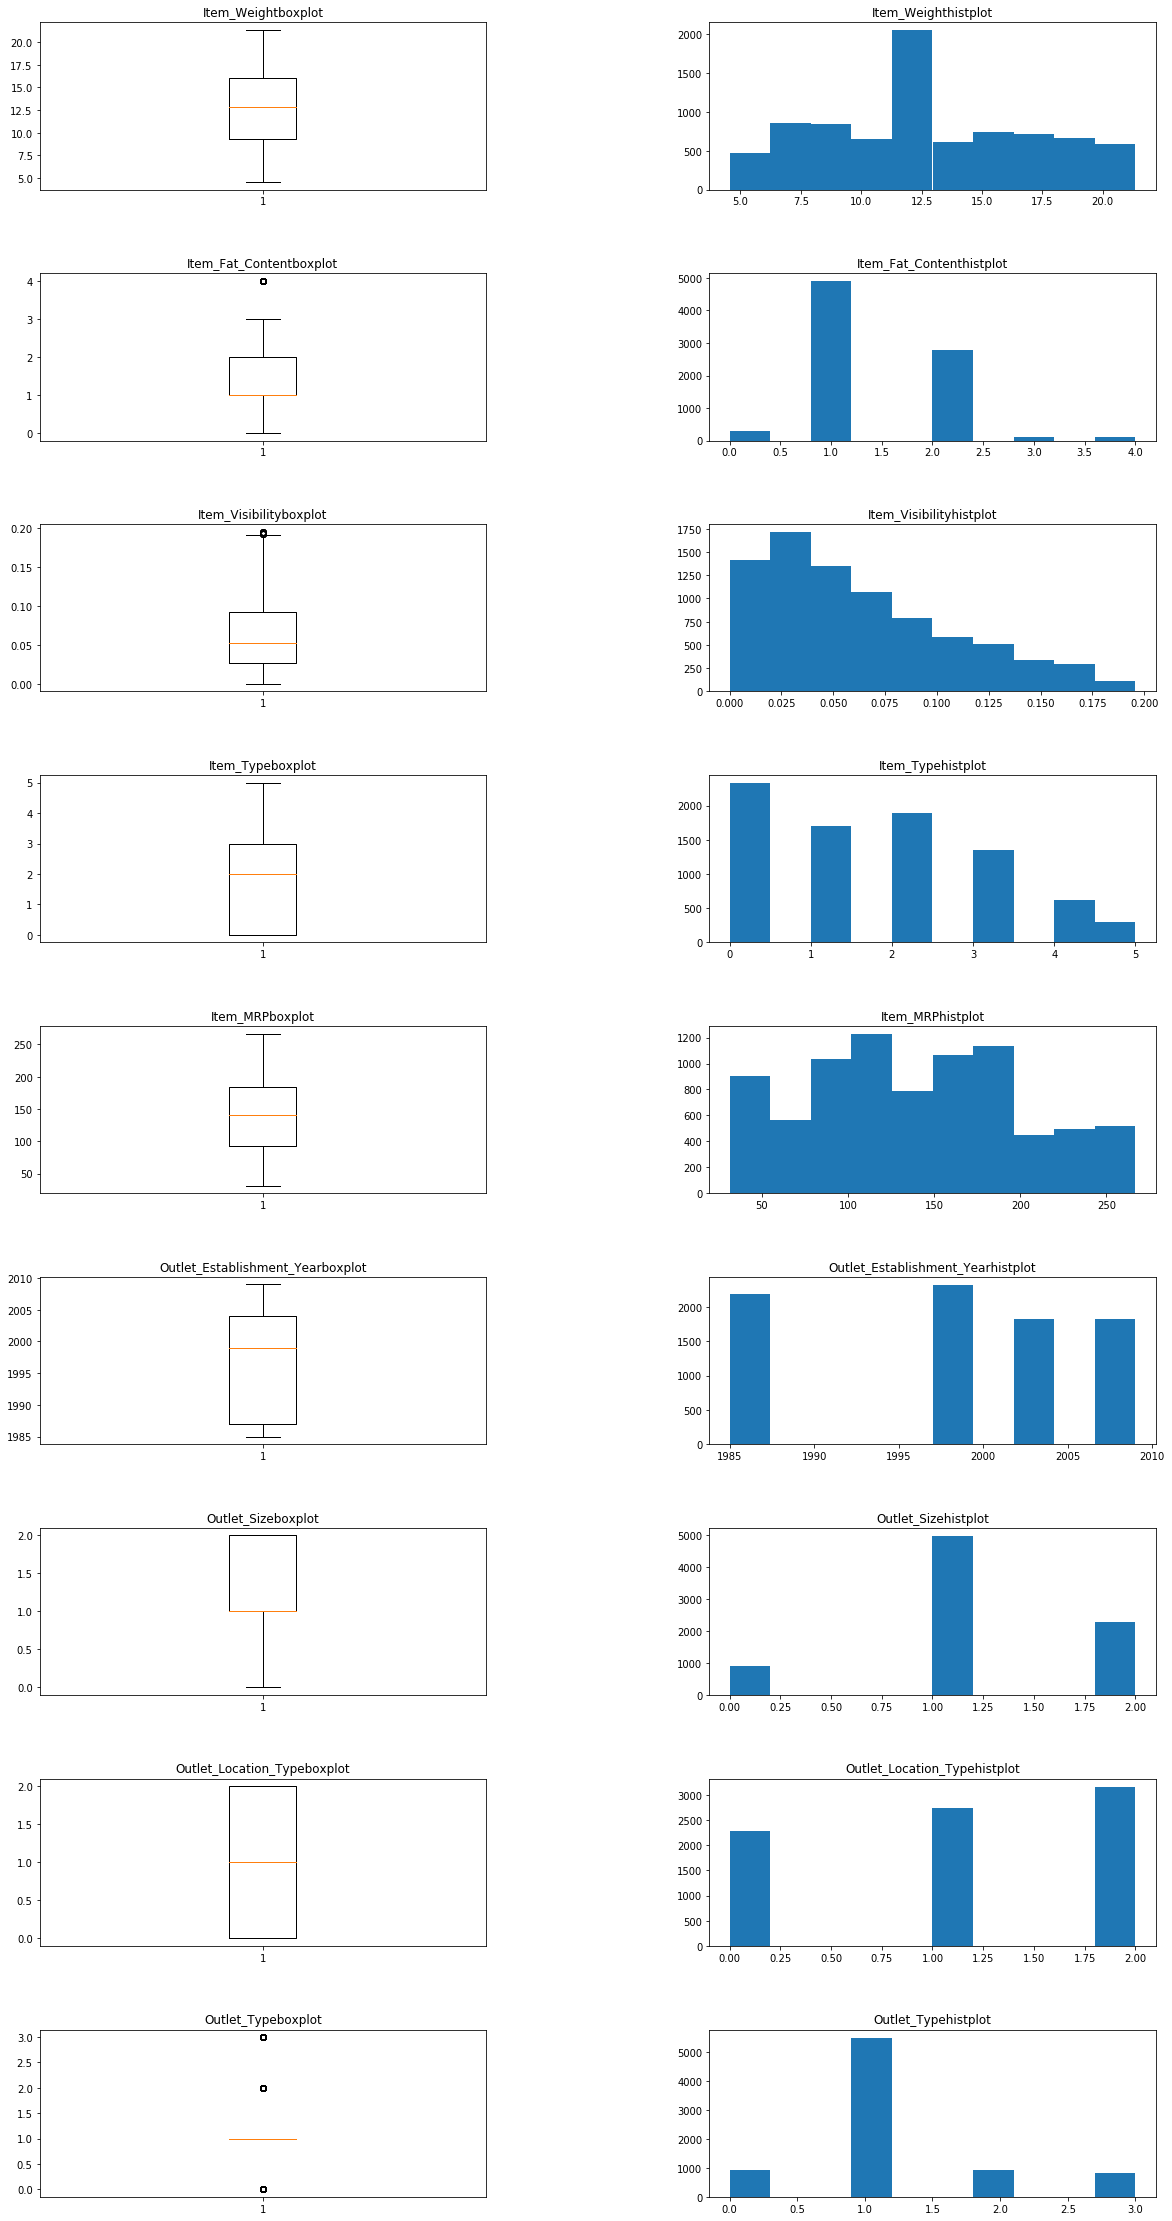

In [393]:
plt.figure(figsize=(20,40))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
for i in range((len(num_cal))):
    plt.subplot(9,2,2*i+1)
    plt.boxplot(newdata[num_cal[i]])
    plt.title(num_cal[i]+"boxplot")
    plt.subplot(9,2,2*i+2)
    plt.hist(newdata[num_cal[i]])
    plt.title(num_cal[i]+"histplot")
plt.show()

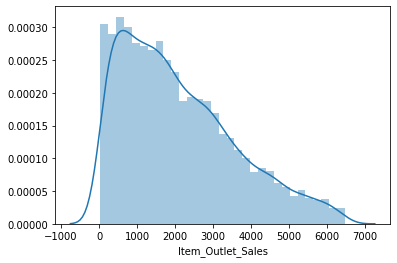

In [394]:
sns.distplot(newdata['Item_Outlet_Sales'])
plt.show()

The ITEM_OUTLET_SALES is positive skewed

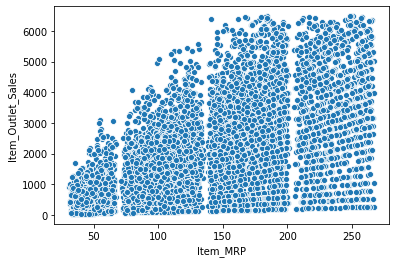

In [395]:
sns.scatterplot(x = newdata['Item_MRP'], y = newdata['Item_Outlet_Sales'], data =newdata)
plt.show()

Eventhough, it looks like Sales increase with MRP, there are less number of sales for high MRP value.

In [396]:
newdata['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

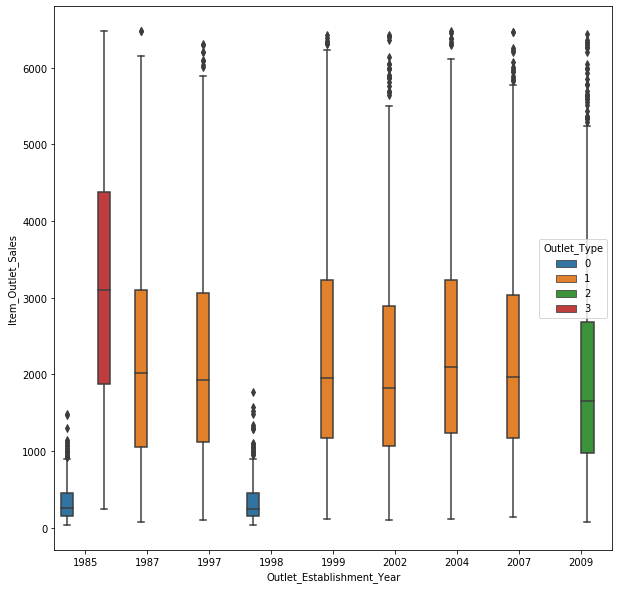

In [397]:
fig,axes = plt.subplots(figsize = (10,10))
sns.boxplot(x = newdata['Outlet_Establishment_Year'], y = newdata['Item_Outlet_Sales'], hue = newdata['Outlet_Type'], ax = axes )
plt.plot

In [398]:
# Splitting
Y = newdata['Item_Outlet_Sales']
X = newdata.drop('Item_Outlet_Sales', axis = 1)

In [399]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.25)

In [403]:
#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [404]:
#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression

In [405]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

In [406]:
models=[LinearRegression(),RandomForestRegressor(),AdaBoostRegressor(),SVR(),KNeighborsRegressor()]
model_names=['LinearRegression','RandomForestRegressor','AdaBoostRegressor','SVR','KNeighborsRegressor']
rmse=[]
Score=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,Y_train)
    test_pred=clf.predict(X_test)
    Score.append(clf.score(X_train,Y_train))
    rmse.append(np.sqrt(mean_squared_error(test_pred,Y_test)))
d={'Modelling Algo':model_names,'Score':Score,'RMSE':rmse}

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [407]:
from pandas import DataFrame
dd=pd.DataFrame(d,index=[1,2,3,4,5])
dd

,Modelling Algo,Score,RMSE
1,LinearRegression,0.487040,1075.461069
2,RandomForestRegressor,0.909798,1050.273241
3,AdaBoostRegressor,0.556546,1012.282669
4,SVR,-0.036446,1516.991796
5,KNeighborsRegressor,0.625904,1107.808937


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


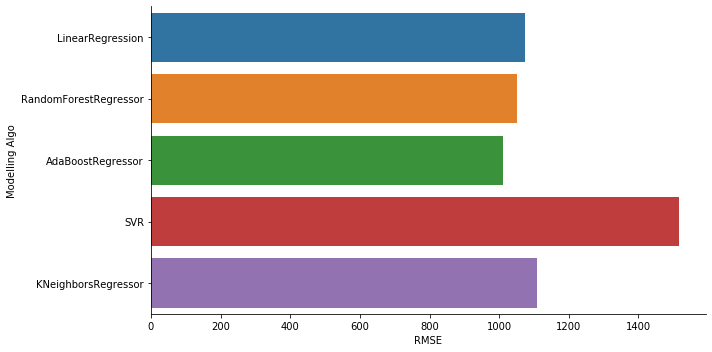

In [408]:
sns.factorplot(y='Modelling Algo',x='RMSE',data=dd,kind='bar',size=5,aspect=2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


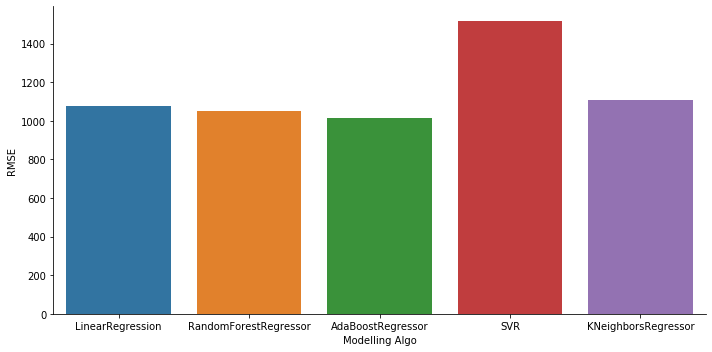

In [409]:
sns.factorplot(x='Modelling Algo',y='RMSE',data=dd,kind='bar',size=5,aspect=2)

Random forest is less RMSE 
Tuning the model for better preformance

selection of best hyperparameter for RF

In [412]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [414]:
from sklearn.model_selection import GridSearchCV

In [417]:
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,return_train_score=True)
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   20.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10],
        

In [418]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 100}

In [436]:
rf1=RandomForestRegressor(max_depth=10,min_samples_leaf=100,min_samples_split=200,n_estimators=100)
rf1.fit(X_train,Y_train)

test_pred=rf1.predict(X_test)

rmse=(np.sqrt(mean_squared_error(test_pred,Y_test)))
print(rmse)

984.5613784176002
